<font size="6" color=red><b><center> Assignment on Classification </center></b></font> 

In [1]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1 Read the dataset to python environment

In [2]:
data = pd.read_excel("C:\\Users\\User\\Downloads\\iris(3).xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2. Do the necessary pre-processing steps

Analyse the dataset(perform some descriptive analysis)

In [4]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#using isna function to check whether any column contains any missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

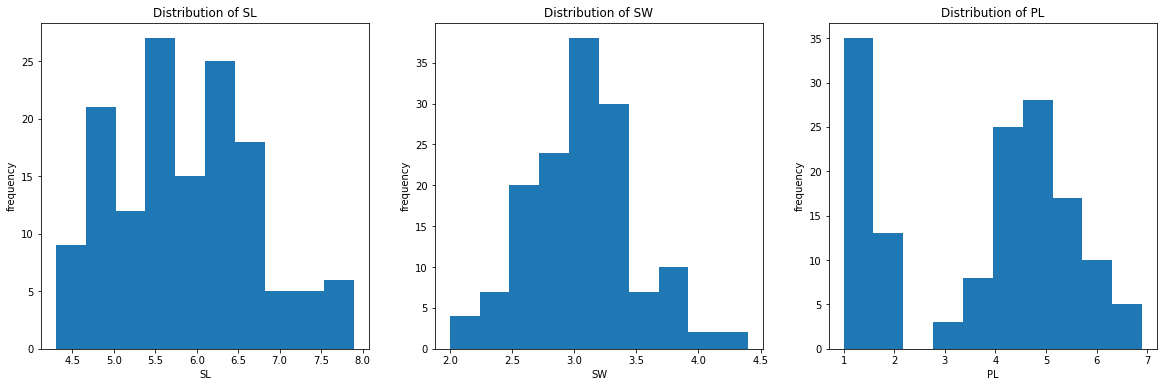

In [9]:
#plot the histogram of columns that contains missing values.
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Distribution of SL")
plt.hist(data['SL'])
plt.xlabel("SL")
plt.ylabel("frequency")
plt.subplot(1,3,2)
plt.hist(data['SW'])
plt.title("Distribution of SW")
plt.xlabel("SW")
plt.ylabel("frequency")
plt.subplot(1,3,3)
plt.hist(data['PL'])
plt.title("Distribution of PL")
plt.xlabel("PL")
plt.ylabel("frequency")
plt.show()

In [10]:
#From the histogram we analysed that all these 3 column's values are skewed,so we replace the missing values with its median
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data['SL']=pd.DataFrame(Imputer.fit_transform(data[['SL']]))
Imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data['SW']=pd.DataFrame(Imputer.fit_transform(data[['SW']]))
Imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data['PL']=pd.DataFrame(Imputer.fit_transform(data[['PL']]))

In [11]:
#now the dataset free of missing values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
#check any duplicates in the data
duplicate=data.duplicated()
print('number of duplicates=',sum(duplicate))
data[duplicate]

number of duplicates= 3


,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
data.shape

(150, 5)

In [14]:
#drop that rows contains duplicates
data=data.drop_duplicates()

In [15]:
data.shape

(147, 5)

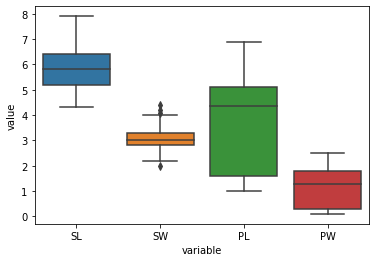

In [16]:
#plot boxplot for analyse any outliers in the data
df = pd.DataFrame(data = data, columns = ['SL', 'SW', 'PL', 'PW'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [17]:
#Outliers are handled by Winsorization technique-Replaced with percetile values
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='quantiles',tail='both',fold=0.05,variables=['SW'])
data['SW']=winsor.fit_transform(data[['SW']])

C:\Users\User\AppData\Local\Temp\ipykernel_13584\1381627902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SW']=winsor.fit_transform(data[['SW']])


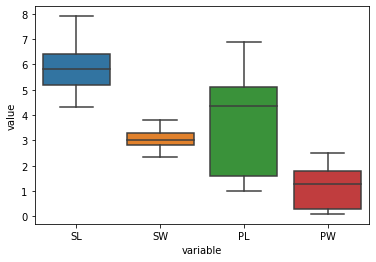

In [18]:
#Check again it contains any outliers
df = pd.DataFrame(data = data, columns = ['SL', 'SW', 'PL', 'PW'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

3. Find out which classification model gives the best result (also do random forest algorithm)

In [19]:
#split the columns as features and target
x=data[['SL', 'SW', 'PL', 'PW']]
y=data['Classification']

In [20]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

In [21]:
#split the data as train and test data(20% data reserved for testing purpose)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state =42)

In [22]:
data.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.866667,3.043129,3.802041,1.208844
std,0.809053,0.386482,1.723000,0.757874
min,4.300000,2.330000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,3.800000,6.900000,2.500000


In [23]:
#For Making every features into same scale do some scaling techniques
num_cols=['SL', 'SW', 'PL', 'PW']
#Apply standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.loc[:,num_cols] = sc.fit_transform(x_train[num_cols])
x_test.loc[:,num_cols] = sc.fit_transform(x_test[num_cols])


# logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [25]:
#Evaluation metrix
from sklearn.metrics import  accuracy_score
print("The accuracy score of logistic regression model is:",accuracy_score(y_test, y_pred))

The accuracy score of logistic regression model is: 0.9555555555555556


In [26]:
#cross validation
from sklearn.model_selection import cross_validate
cvs=cross_validate(lr,x,y,cv=4)
cvs['test_score'].mean()

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.9455705705705706

# KNN Algorithm

In [27]:
#Find out the best k value for KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
lst_acc=[]
for i in range(3,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    lst_acc.append(acc)

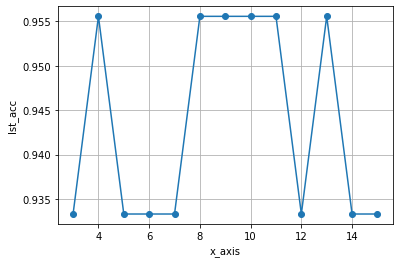

In [28]:
x_axis=range(3,16)
plt.plot(x_axis,lst_acc,'o-')
plt.xlabel('x_axis')
plt.ylabel('lst_acc')
plt.grid()

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print('The Accurcy Score of KNeighborsClassifier is=',accuracy_score(y_test,y_pred))

The Accurcy Score of KNeighborsClassifier is= 0.9333333333333333


In [30]:
cvs=cross_validate(knn,x,y,cv=4)
cvs['test_score'].mean()

0.9523273273273274

# SVC (Support Vector Classifier)

In [31]:
#SVC with linear kernal
from sklearn.svm import SVC
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(x_train,y_train)
y_pred=clf_svm.predict(x_test)

In [32]:
print('The Accurcy Score of SVM with linear kernel is=',accuracy_score(y_test,y_pred))

The Accurcy Score of SVM with linear kernel is= 0.9555555555555556


In [33]:
cvs=cross_validate(clf_svm,x,y,cv=4)
cvs['test_score'].mean()

0.952515015015015

In [34]:
#SVC with rbf
from sklearn.svm import SVC
rbf_svm=SVC()
rbf_svm=rbf_svm.fit(x_train,y_train)
y_pred=rbf_svm.predict(x_test)

In [35]:
print('The Accurcy Score of SVM using Radial Basis Function kernel=',accuracy_score(y_test,y_pred))

The Accurcy Score of SVM using Radial Basis Function kernel= 0.9555555555555556


In [36]:
cvs=cross_validate(rbf_svm,x,y,cv=4)
cvs['test_score'].mean()

0.9453828828828829

# DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9555555555555556

In [38]:
print('The Accurcy Score of DecisionTreeClassifier is=',accuracy_score(y_test,y_pred))

The Accurcy Score of DecisionTreeClassifier is= 0.9555555555555556


In [39]:
cvs=cross_validate(dt,x,y,cv=4)
cvs['test_score'].mean()

0.9592717717717718

# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('The Accurcy Score of RandomForestClassifier is=',accuracy_score(y_test,y_pred))

The Accurcy Score of RandomForestClassifier is= 0.9555555555555556


In [42]:
cvs=cross_validate(rf,x,y,cv=4)
cvs['test_score'].mean()

0.9662162162162162

<font size="3" color=red>From the accuracy score of each algorithm, it shows that RandomForestClassifier,SVC (Support Vector Classifier) and logistic Regression algorithms(accuracy value of 0.955) are best for working with this iris data.</font>

<font size="3" color=red>From generalised view(using cross validation) random forest(CVS value=0.966) is the best algorithm for this dataset.This algorithm uses collection of models  to make predictions rather than an individual model.</font>